In [281]:
import pandas as pd
import numpy as np

data=pd.read_csv("./train.csv")

# Splitting the train data to check underfitting/overfitting etc.
data=data.sample(frac=1).reset_index(drop=True)

# Calculate the index to split
split_index = int(len(data) * 0.5)

# Split the DataFrame
train = data[:split_index]
test = data[split_index:]

In [282]:
Y=np.array(train)[:,2]
X=np.array(train)[:,1].reshape(-1,1)
Y_test=np.array(test)[:,2]
X_test=np.array(test)[:,1]

def trainModel(m, X, Y):
    ### Degree of polynomial m
    indices=np.arange(0, m+1).reshape(1,-1)
    X=X**indices 
    # X is now nx(m+1) matrix, n=320

    ### B=(X'X)^-1.(X'Y)
    XtX=np.matmul(X.transpose(),X)
    XtY=np.matmul(X.transpose(),Y)
    B=np.matmul(np.linalg.inv(np.float64(XtX)),XtY)
    return B

def resultingPolynomial(B, X):
    m = B.size - 1
    X_poly = np.vander(X.flatten(), m+1, increasing=True)  # Polynomial features

    Y_estimated = np.matmul(X_poly, B)
    return Y_estimated

def sumSquareResiduals(B, X, Y):
    Y_est=resultingPolynomial(B,X)
    print(Y_est)
    print(Y)
    return np.sum((Y-Y_est)**2)

def findBestFit(X, Y):
    minM=0
    minSSR=np.infty
    # minB=np.zeros(10) # init 
    arrayB=[]
    for i in range(1, 51): # m from 1 to 50
        B=trainModel(i, X, Y)
        SSR=sumSquareResiduals(B, X_test.reshape(-1,1), Y_test)
        arrayB.append(B)
        if SSR<minSSR:
            minSSR=SSR
            minM=i
            # minB=B
    # print (minM)
    return minM, arrayB[minM], arrayB[minM-1], arrayB[minM]

    # best m, bestfit B, underfit B, overfit B
minM, bestB, underfitB, overfitB = findBestFit(X, Y)
print(f"Best degree of polynomial: {minM}")

[137.41759190004683 8.51027348514532 5.517908372275528 200.55192590559136
 117.61320151627822 -11.459584915905808 -7.052203952219742
 42.771537722385624 112.51790173248332 58.78937647055123
 62.753944254073005 60.2199096920181 188.8734767032186 15.66661306325095
 145.88378476846896 100.0712212252014 62.30213188620044 122.75588148520995
 26.832189838750153 147.18512405570078 112.00972840779409
 165.89804558972133 76.72440027986282 -8.974427020229555
 137.46713441705316 48.95896672476493 154.08627151450267
 56.511808859262935 27.784516704782106 61.71076058511687 69.13738157801077
 52.81380801813558 128.63147043241565 -5.8651558310221645
 179.23539251758265 138.20898955493465 88.28985666001913
 144.18421646108266 131.95147973058639 134.91080236221873
 69.29672911337866 197.46569902282485 88.10994984951965
 -11.752286633232075 87.00473652441758 37.61831480491794
 161.46677419949538 2.5710534014046402 165.5170977134901
 -4.345804275939727 49.9368081540041 173.34916724665297 108.729969229791

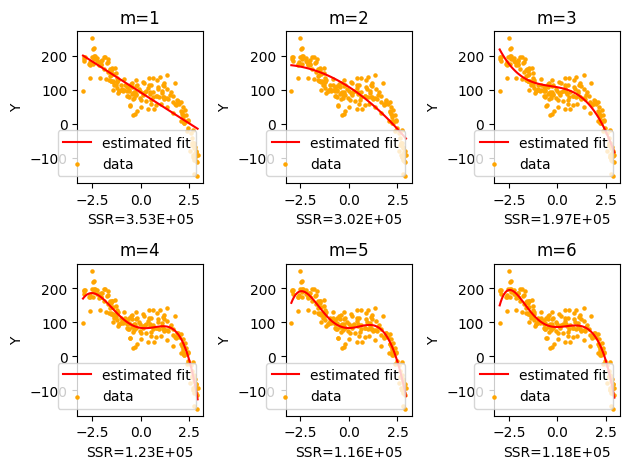

In [283]:
# import matplotlib.pyplot as plt

# def trainAndVisualizePerformance(i):
#     # for m=2, 5, 10 , 15, 20, 25
#     # m=1 if i==0 else i*5
#     m=i+1
#     B=trainModel(m, X, Y)
#     X_range=np.linspace(X_test.min(), X_test.max(), X_test.shape[0])
#     Y_est=resultingPolynomial(B, X_range.reshape(-1,1))
#     SSR=np.sum((Y_test-Y_est)**2)

#     plt.subplot(2,3,i+1)
#     plt.plot(X_range, Y_est, 'r-', label="estimated fit")
#     plt.scatter(X_test, Y_test, c='orange', s=5, label="data")
#     plt.title(f"m={m}")
#     plt.xlabel(f"SSR={SSR:.2E}")
#     # plt.xlabel("X")
#     plt.ylabel("Y")
#     plt.legend()

# for i in range(0, 6) : trainAndVisualizePerformance(i)
# plt.tight_layout()
# plt.show()
import matplotlib.pyplot as plt
import numpy as np

def trainAndVisualizePerformance(i):
    # Set polynomial degree m
    m = i + 1  # m = 1 for i=0, and m=i+1
    B = trainModel(m, X, Y)
    
    # Generate X_range for smooth plotting
    X_range = np.linspace(X_test.min(), X_test.max(), 100)
    
    # Estimate Y values for both X_test and X_range
    Y_est_test = resultingPolynomial(B, X_test)  # For calculating SSR
    Y_est_range = resultingPolynomial(B, X_range.reshape(-1, 1))  # For smooth plotting
    
    # Calculate SSR using X_test
    SSR = np.sum((Y_test - Y_est_test) ** 2)

    # Plot
    plt.subplot(2, 3, i+1)
    plt.plot(X_range, Y_est_range, 'r-', label="estimated fit")  # Smooth curve
    plt.scatter(X_test, Y_test, c='orange', s=5, label="data")  # Actual data points
    plt.title(f"m={m}")
    plt.xlabel(f"SSR={SSR:.2E}")
    plt.ylabel("Y")
    plt.legend()

# Visualize for m = 1, 2, 3, 4, 5, 6
for i in range(0, 6):
    trainAndVisualizePerformance(i)

plt.tight_layout()
plt.show()


Polynomial Degree (m): 1, SSR: 353423.25
Polynomial Degree (m): 2, SSR: 301633.49
Polynomial Degree (m): 3, SSR: 197301.07
Polynomial Degree (m): 4, SSR: 122757.29
Polynomial Degree (m): 5, SSR: 115799.61
Polynomial Degree (m): 6, SSR: 117530.71
Polynomial Degree (m): 7, SSR: 117554.74
Polynomial Degree (m): 8, SSR: 118953.61
Polynomial Degree (m): 9, SSR: 119401.36
Polynomial Degree (m): 10, SSR: 119633.15
Polynomial Degree (m): 11, SSR: 121245.84
Polynomial Degree (m): 12, SSR: 123271.71
Polynomial Degree (m): 13, SSR: 122928.42
Polynomial Degree (m): 14, SSR: 121986.77


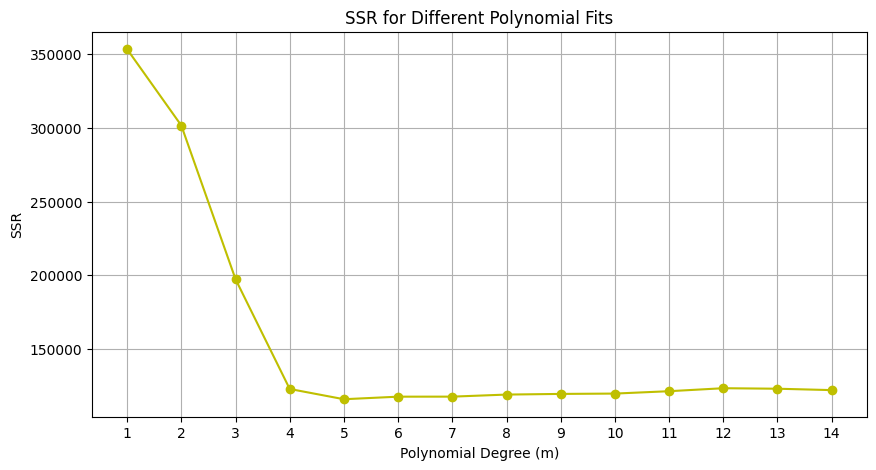

R^2 values for different fits: [0.6918416  0.73699836 0.82796836 0.89296491 0.89903148 0.89752209
 0.89750114 0.89628143 0.89589103 0.89568892 0.89428278 0.89251637
 0.89281569 0.89363675]


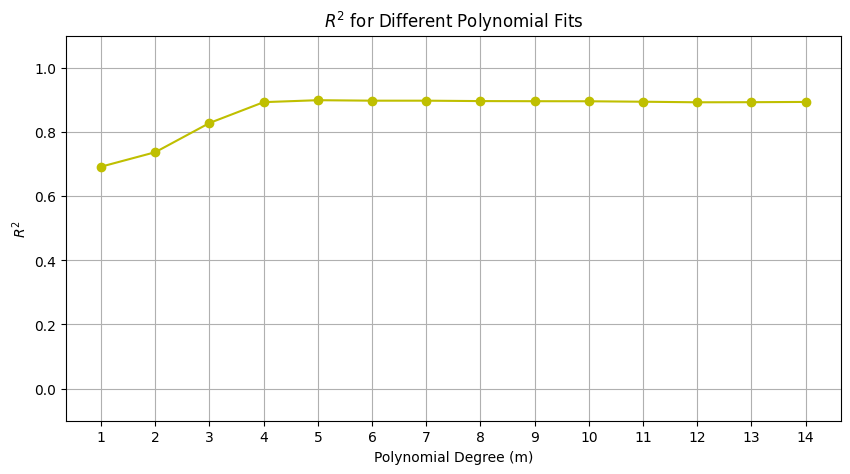

In [284]:
# # plot ssr
# def visualizeSSR():
#     SSR_range=[]
#     for i in range(1, 24): # m from 1 to 50
#         B=trainModel(i, X, Y)
#         SSR_range.append(sumSquareResiduals(B, X, Y))
#     X_range=np.arange(1,24)
#     plt.plot(X_range, SSR_range, 'y-')
#     plt.title("SSR for different fits")
#     plt.xlabel("m")
#     plt.ylabel("SSR")
#     plt.show()
#     return SSR_range

# def visualizeRsquare(SSR):
#     SYY=np.sum((Y-Y.mean())**2)
#     R_square=1-SSR/SYY
#     X_range=np.arange(1,24)
#     plt.plot(X_range, R_square, 'y-')
#     plt.title(r"$R^2$ for different fits")
#     plt.xlabel("m")
#     plt.ylabel(r"$R^2$")
#     plt.show()

# SSR=visualizeSSR()
# visualizeRsquare(np.array(SSR))
# import matplotlib.pyplot as plt
# import numpy as np

# # Plot SSR for different fits
# def visualizeSSR():
#     SSR_range = []
#     for i in range(1, 15):  # m from 1 to 23
#         B = trainModel(i, X, Y)
#         # SSR = sumSquareResiduals(B, X, Y)
        
#         SSR_range.append(SSR)
        
#     X_range = np.arange(1, 15)
#     plt.plot(X_range, SSR_range, 'y-')
#     plt.title("SSR for different fits")
#     plt.xlabel("Polynomial Degree (m)")
#     plt.ylabel("SSR")
#     plt.show()
    
#     return SSR_range

# # Plot R^2 for different fits
# def visualizeRsquare(SSR_range):
#     SYY = np.sum((Y - Y.mean())**2)
#     R_square = 1 - np.array(SSR_range) / SYY  # Calculate R^2
    
#     X_range = np.arange(1, 15)
#     plt.plot(X_range, R_square, 'y-')
#     plt.title(r"$R^2$ for different fits")
#     plt.xlabel("Polynomial Degree (m)")
#     plt.ylabel(r"$R^2$")
#     plt.show()

# # Get SSR and plot R^2
# SSR = visualizeSSR()
# visualizeRsquare(SSR)
import matplotlib.pyplot as plt
import numpy as np

# Plot SSR for different fits
def visualizeSSR():
    SSR_range = []
    for i in range(1, 15):  # m from 1 to 14
        B = trainModel(i, X, Y)
        # SSR = sumSquareResiduals(B, X, Y)
        X_range = np.linspace(X_test.min(), X_test.max(), 100)
        
        # Estimate Y values for both X_test and X_range
        Y_est_test = resultingPolynomial(B, X_test)  # For calculating SSR
        # Y_est_range = resultingPolynomial(B, X_range.reshape(-1, 1))  # For smooth plotting
        
        # Calculate SSR using X_test
        SSR = np.sum((Y_test - Y_est_test) ** 2)
        SSR_range.append(SSR)
        print(f"Polynomial Degree (m): {i}, SSR: {SSR:.2f}")  # Print SSR values for each degree
        
    X_range = np.arange(1, 15)
    plt.figure(figsize=(10, 5))
    plt.plot(X_range, SSR_range, 'y-', marker='o')
    plt.title("SSR for Different Polynomial Fits")
    plt.xlabel("Polynomial Degree (m)")
    plt.ylabel("SSR")
    plt.grid()
    plt.xticks(X_range)
    plt.show()
    
    return SSR_range

# Plot R^2 for different fits
def visualizeRsquare(SSR_range):
    SYY = np.sum((Y - Y.mean())**2)
    R_square = 1 - np.array(SSR_range) / SYY  # Calculate R^2
    print("R^2 values for different fits:", R_square)  # Print R² values for diagnostics
    
    X_range = np.arange(1, 15)
    plt.figure(figsize=(10, 5))
    plt.plot(X_range, R_square, 'y-', marker='o')
    plt.title(r"$R^2$ for Different Polynomial Fits")
    plt.xlabel("Polynomial Degree (m)")
    plt.ylabel(r"$R^2$")
    plt.grid()
    plt.xticks(X_range)
    plt.ylim(-0.1, 1.1)  # Ensuring the R² plot has the correct range
    plt.show()

# Get SSR and plot R^2
SSR = visualizeSSR()
visualizeRsquare(SSR)



[137.41759190004683 8.51027348514532 5.517908372275528 200.55192590559136
 117.61320151627822 -11.459584915905808 -7.052203952219742
 42.771537722385624 112.51790173248332 58.78937647055123
 62.753944254073005 60.2199096920181 188.8734767032186 15.66661306325095
 145.88378476846896 100.0712212252014 62.30213188620044 122.75588148520995
 26.832189838750153 147.18512405570078 112.00972840779409
 165.89804558972133 76.72440027986282 -8.974427020229555
 137.46713441705316 48.95896672476493 154.08627151450267
 56.511808859262935 27.784516704782106 61.71076058511687 69.13738157801077
 52.81380801813558 128.63147043241565 -5.8651558310221645
 179.23539251758265 138.20898955493465 88.28985666001913
 144.18421646108266 131.95147973058639 134.91080236221873
 69.29672911337866 197.46569902282485 88.10994984951965
 -11.752286633232075 87.00473652441758 37.61831480491794
 161.46677419949538 2.5710534014046402 165.5170977134901
 -4.345804275939727 49.9368081540041 173.34916724665297 108.729969229791

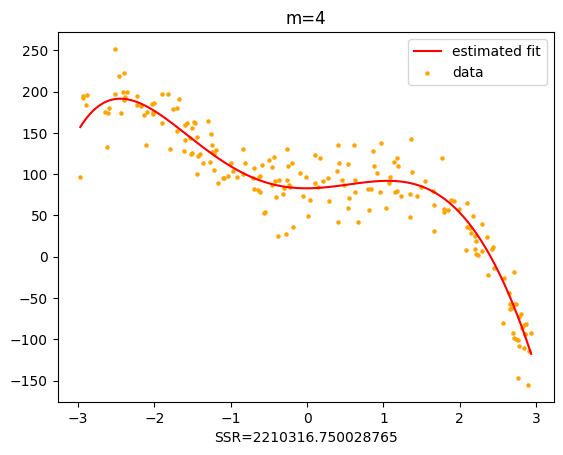

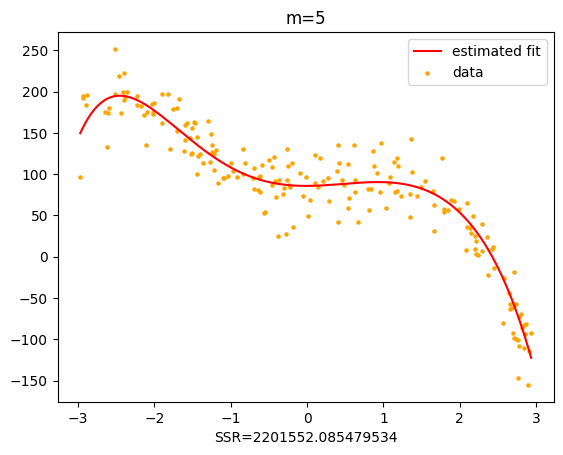

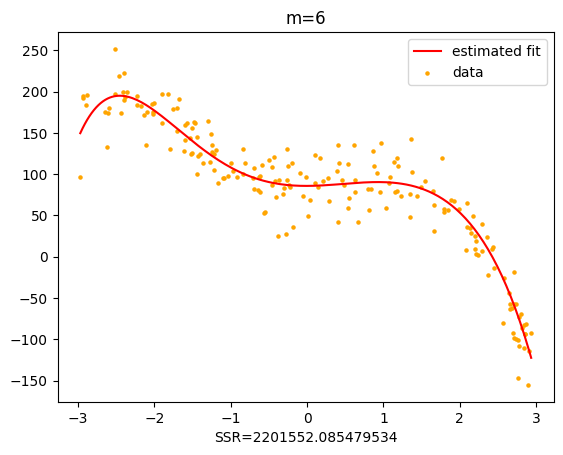

In [285]:
m_best, B_best, B_under, B_over=findBestFit(X,Y)
print(f"m={m_best}")

def generateDifferentFits(m, B, name):
    # B=trainModel(m, X, Y)
    X_range=np.linspace(X_test.min(), X_test.max(), X_test.shape[0])
    Y_est=resultingPolynomial(B, X_range.reshape(-1,1))
    SSR=np.sum((Y_test-Y_est)**2)

    plt.plot(X_range, Y_est, 'r-', label="estimated fit")
    plt.scatter(X_test, Y_test, c='orange', s=5, label="data")
    plt.title(f"m={m}")
    plt.xlabel(f"SSR={SSR}")
    # plt.ylabel("Y")
    plt.legend()
    plt.savefig(name)
    plt.show()

generateDifferentFits(m_best-1, B_under, "3_underfit.png")
generateDifferentFits(m_best, B_best, "3_correctfit.png")
generateDifferentFits(m_best+1, B_over, "3_overfit.png")

In [286]:
import pickle

def finalModel(m):
    # train on the whole data
    Ynew=np.array(train_data)[:,2]
    Xnew=np.array(train_data)[:,1].reshape(-1,1)

    indices=np.arange(0, m+1).reshape(1,-1)
    Xnew=Xnew**indices 
    # X is now 400x(m+1) matrix

    ### B=(X'X)^-1.(X'Y)
    XtX=np.matmul(Xnew.transpose(),Xnew)
    XtY=np.matmul(Xnew.transpose(),Ynew)
    B=np.matmul(np.linalg.inv(np.float64(XtX)),XtY)

    # Save beta
    # np.save('weights.npy', B)
    with open('3_weights.pkl', 'wb') as f:
        pickle.dump(np.array(B), f)
    return B

final_B=finalModel(m_best)
final_X_test=np.array(test_data)[:,1].reshape(-1,1)
y_predict=resultingPolynomial(final_B, final_X_test)
predictions=test_data.assign(y=y_predict)
predictions.to_csv("3_predictions.csv")